In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [246]:
pd.set_option('display.max_rows', None)

In [291]:
aff = pd.read_csv(r"C:\Users\chris\Desktop\MICCAI-review-thesis\04-analysis\affiliations_data.csv", sep = ";")
dis = pd.read_csv(r"C:\Users\chris\Desktop\MICCAI-review-thesis\04-analysis\disease_data.csv", sep = ";")
jus = pd.read_csv(r"C:\Users\chris\Desktop\MICCAI-review-thesis\04-analysis\justification_data.csv", sep = ";")
anno = pd.read_csv(r"C:\Users\chris\Desktop\MICCAI-review-thesis\04-analysis\annotations_data.csv")

In [292]:
aff = aff.fillna(0)
dis = dis.fillna(0)
jus = jus.fillna(0)

In [293]:
df = anno.copy()

### Creating initial df from annotations data

In [294]:
#narrowing down to classification true
df = df[df['Is the article accurately labelled as classification?']=='Yes']

In [295]:
#defining the columns I am interested in
col = ["What is the article's index?",
"Which year is the article from?",
"What type is the dataset?",
"Does the article mention the demographics of the patients/images included in the used dataset?",
"Does the article disclose any affiliations?",
"Does the article include anything about respect for persons (informed consent, voluntary participation) participating in the dataset? ",
"Does the article have any mention of benefience, minimising risk/maximising benefit of work? ",
"Does the article have any mention of justice (equal treatment, fair selection of subjects)?",
"Does the article mention any respect for law/public interest (transparency in methods/results, accountability for actions)?"]


In [296]:
#narrowing down to only these columns
df = df.loc[:, col]

In [297]:
#renaming the columns
col_labels = {"What is the article's index?" : "id" ,
"Which year is the article from?" : "year",
"What type is the dataset?" : "dataset type",
"Does the article mention the demographics of the patients/images included in the used dataset?" : "demographics",
"Does the article disclose any affiliations?" : "affiliations",
"Does the article include anything about respect for persons (informed consent, voluntary participation) participating in the dataset? " : "ethics 1",
"Does the article have any mention of benefience, minimising risk/maximising benefit of work? ": "ethics 2",
"Does the article have any mention of justice (equal treatment, fair selection of subjects)?" : "ethics 3",
"Does the article mention any respect for law/public interest (transparency in methods/results, accountability for actions)?" : "ethics 4"}

df.rename(columns= col_labels, inplace=True)


In [298]:
#changing mixed dataset types to mixed
dataset_type = []
for row in df['dataset type']:
    if "," in row:
        dataset_type.append('Mixed')
    else:
        dataset_type.append(row)

In [299]:
#updating the dataset type
df['dataset type'] = dataset_type

In [300]:
#generating an ethics mentioned y/n list
ethics_list=[]
dataset_type = []
for index in range(len(df)):
    if df.iloc[index, 5] == 'Yes' or df.iloc[index, 6] == 'Yes' or df.iloc[index, 7] == 'Yes' or df.iloc[index, 8] == 'Yes':
        ethics_list.append('Yes')
    else:
        ethics_list.append('No')

In [301]:
#updating the df with this new combined ethics list
df['ethics'] = ethics_list

In [302]:
#removing the now obsolete ethics columns
df.drop(df.columns[[5,6,7,8]], axis=1, inplace=True)

### Merging justification

In [303]:
df1 = pd.merge(df, jus, how='left', on=['id', 'year'])


In [304]:
jus_count = []
jus_enc = []
for index in range(len(df1)):
    if ',' in str(df1.iloc[index, 6]):
        jus = df1.iloc[index,6].split(",")
        jus_count.append(len(jus))
        jus_enc.append(0)
    else: 
        jus_count.append(1)
        if str(df1.iloc[index, 6]) == 'sci':
            jus_enc.append(1)
        elif str(df1.iloc[index, 6]) == 'dis':
            jus_enc.append(2)
        elif str(df1.iloc[index, 6]) == 'nov':
            jus_enc.append(3)
        elif str(df1.iloc[index, 6]) == 'hc':
            jus_enc.append(4)

df1['justification count'] = jus_count
df1['justification encoded'] = jus_enc

## Encoding remaining data

In [305]:
def encoding(df, column, name):
    converted = []
    for index in range(len(df)):
        if df.iloc[index, column] == 'Yes' or df.iloc[index, column] == 'Public':
            converted.append(0)
        elif df.iloc[index, column] == 'No' or df.iloc[index, column] == 'Private':
            converted.append(1)
        elif df.iloc[index, column] == 'Mixed':
            converted.append(2)
    df[name] = converted
    return df

In [306]:
df = encoding(df1, 2, 'dataset type encoded')
df = encoding(df, 3, 'demographics encoded')
df = encoding(df, 4, 'affiliations encoded')
df = encoding(df, 5, 'ethics encoded')

In [307]:
#removing unencoded columns
encoded = df.copy()
encoded.columns

Index(['id', 'year', 'dataset type', 'demographics', 'affiliations', 'ethics',
       'type', 'justification count', 'justification encoded',
       'dataset type encoded', 'demographics encoded', 'affilitaions encoded',
       'ethics encoded'],
      dtype='object')

In [308]:
encoded.drop(encoded.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)

In [311]:
encoded.head()

,id,year,justification count,justification encoded,dataset type encoded,demographics encoded,affilitaions encoded,ethics encoded
0,4,2012,1,1,1,1,0,1
1,7,2012,1,2,0,1,0,0
2,9,2012,1,3,1,1,1,1
3,10,2012,1,1,0,1,0,1
4,13,2012,1,1,1,1,0,1


## Testing graphs

In [347]:
x = encoded['ethics encoded']
y = encoded['demographics encoded']
z = encoded['justification encoded']
m = encoded['id']

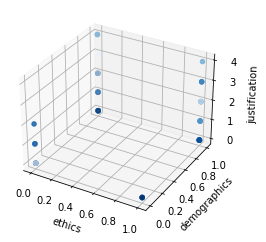

In [348]:
# Creating out first 3D scatterplot in Matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x,y,z, c=m, cmap='Blues')
#mangler at kunne se de forskellige id'er, punkterne ligger jo oven i hinanden, størrelse/farve?


#random seedtal
#transparency
#alpha
#fusk med data - så det kommer til at ligne! (but how?) Papi to the rescue later



ax.set_xlabel('ethics')
ax.set_ylabel('demographics')
ax.set_zlabel('justification')

plt.show()


## Merging disease
Not sure how/if I want to use this, so moving it down

In [341]:
df2 = pd.merge(encoded, dis, how='left', on=['id', 'year'])

## Merging affiliations

After playing around a bit, I realised this format simply doesn't match any of the others. Would require a lot(!) more work to get it to match up - the id's appear multiple times for each unique institution, so would need to merge that data together somehow, giving me a list of countries and types for each id
Further complicated by the fact that the id's are also sometimes a list of different id's, so a lot of overlap and looping necessary to have a list sorted by unique year and id to be able to merge as I have with the others. Will leave this for now!

In [149]:
aff

,Counter 2012,Counter 2021,Type,Country,Name,list of 2012 ids,list of 2021 ids
0,0.0,1.0,gov,Australia,Australian Research Council,0,283
1,0.0,2.0,uni,Australia,La Trobe University,0,"315, 321"
2,0.0,1.0,uni,Australia,University of Adelaide,0,283
3,1.0,0.0,uni,Australia,The University of Sydney,9,0
4,1.0,0.0,gov,Austria,Austrian Science Fund,242,0
5,1.0,0.0,hosp,Austria,"St.Anna Childrens Hospital, Dept. Pediatrics M...",242,0
6,1.0,0.0,uni,Austria,University of Salzburg,242,0
7,1.0,0.0,uni,Belgium,"IBBT-KU Leuven Future Health Department, Belgium",13,0
8,1.0,0.0,corp,Belgium,"icoMetrix NV, Leuven, Belgium",13,0
9,1.0,0.0,gov,Belgium,IWT - TBM project 070717 and Research Foundati...,13,0


In [141]:
aff.drop(aff.columns[[0,1,4]], axis=1, inplace=True)

In [134]:
len(aff)

248

In [142]:
aff1 = pd.DataFrame()
for index in range(len(aff)):
    
    #checking if 2012 id is a list  
    if "," in str(aff.iloc[index, 2]):
        row = aff.iloc[index, :]
        id_list = aff.iloc[index, 2].split(",")
        for element in id_list:
            aff1 = aff1.append(row, ignore_index=True)
    
    #checking if 2021 id is a list 
    elif "," in str(aff.iloc[index, 3]):
        row = aff.iloc[index, :]
        id_list = aff.iloc[index, 3].split(",")
        for element in id_list:
            aff1 = aff1.append(row, ignore_index=True)
    
    else:
        aff1 = aff1.append(aff.iloc[index, :], ignore_index = True)
